In [19]:
import json
import collections

files=['C:/Users/Parivesh/Downloads/my_spotify_data/MyData/StreamingHistory0.json','C:/Users/Parivesh/Downloads/my_spotify_data/MyData/StreamingHistory1.json','C:/Users/Parivesh/Downloads/my_spotify_data/MyData/StreamingHistory2.json','C:/Users/Parivesh/Downloads/my_spotify_data/MyData/StreamingHistory3.json']

def merge_JsonFiles(filename):
    result = list()
    for f1 in filename:
        with open(f1, 'r') as infile:
            result.extend(json.load(infile))

    with open('C:/Users/Parivesh/Downloads/my_spotify_data/MyData/all_streaming_merged.json', 'w') as output_file:
        json.dump(result, output_file)

merge_JsonFiles(files)

In [20]:
f0 = open('C:/Users/Parivesh/Downloads/my_spotify_data/MyData/all_streaming_merged.json',encoding="utf8")
data0 = json.load(f0)
f0.close()

In [21]:
print(len(data0))

31215


In [22]:
endtime=[]
artistName = []
trackName = []
msPlayed = []
for i in range(len((data0))):
    time = data0[i]["endTime"]
    artist = data0[i]["artistName"]
    name = data0[i]["trackName"]
    ms = data0[i]["msPlayed"]
    endtime.append(time)
    artistName.append(artist)
    trackName.append(name)
    msPlayed.append(ms)



In [23]:
t=0
max_track = max(trackName,key=trackName.count)
print("most played track:",max_track,"by",artistName[trackName.index(str(max_track))])
counter=collections.Counter(trackName)
print("number of times played:",max(counter.values()))
for i in range(len((data0))):
    if trackName[i] == max_track:
        t = t+msPlayed[i]
         
print("total time played:",t/3600000,"hours")

most played track: Chateau Lobby #4 (in C for Two Virgins) by Father John Misty
number of times played: 186
total time played: 8.492336388888889 hours


In [24]:
t=0
max_artist = max(artistName,key=artistName.count)
print("most played artist:",max_artist)
counter1=collections.Counter(artistName)
print("number of times played:",max(counter1.values()))
for i in range(len((data0))):
    if artistName[i] == max_artist:
        t = t+msPlayed[i]
         
print("total time played:",t/3600000,"hours")

most played artist: Of Monsters and Men
number of times played: 1776
total time played: 103.54714833333334 hours


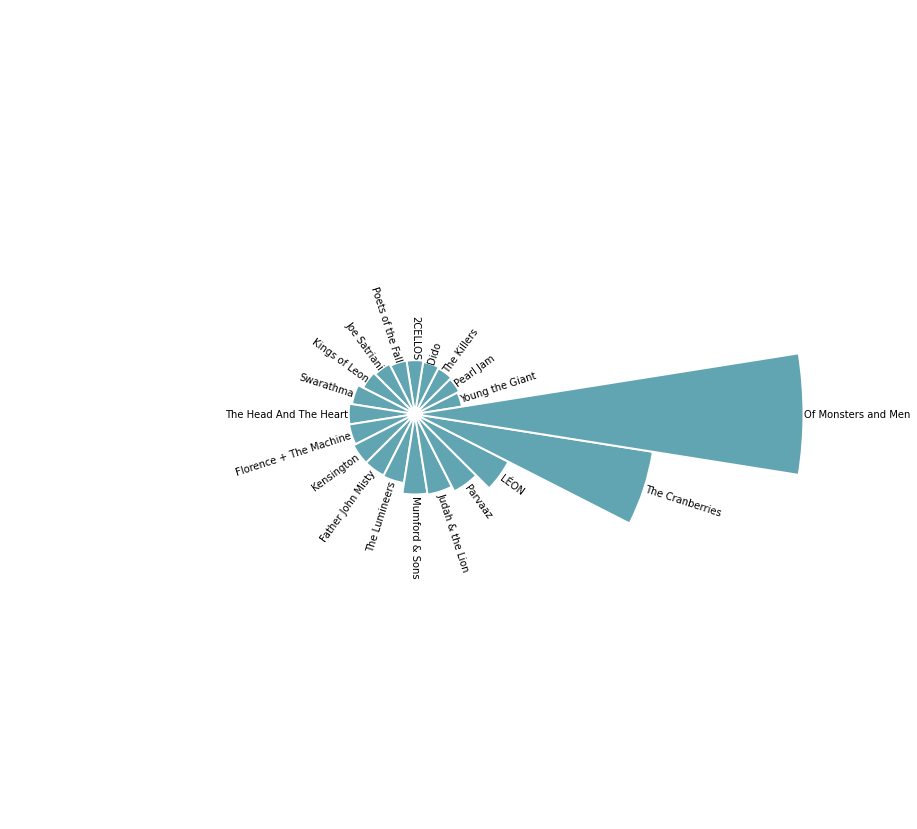

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


k = 20
name1 = []
number = []
for i in range(k): 
    artist_name=name1.append(counter1.most_common(k)[i][0])
    artist_number=number.append(counter1.most_common(k)[i][1])


# Build a dataset
df = pd.DataFrame(
        {
            'Name': name1,
            'Value': number
        })

# Reorder the dataframe
df = df.sort_values(by=['Value'])

# initialize the figure
plt.figure(figsize=(30,15))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

In [70]:
print(name1)

['Of Monsters and Men', 'The Cranberries', 'LÉON', 'Parvaaz', 'Judah & the Lion', 'Mumford & Sons', 'The Lumineers', 'Kensington', 'Father John Misty', 'Florence + The Machine', 'The Head And The Heart', 'Swarathma', 'Kings of Leon', 'Joe Satriani', 'Poets of the Fall', '2CELLOS', 'Dido', 'The Killers', 'Pearl Jam', 'Young the Giant']


In [71]:
print(number)

[1776, 1078, 435, 349, 324, 319, 269, 265, 265, 254, 252, 240, 214, 205, 195, 194, 188, 182, 174, 164]
